In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy import stats

In [2]:
d=pd.read_csv(r'C:\Users\Nalin kumar\\Downloads\top 100.csv')
print(d)

    Serial No. Indian Cities Indian States   Population Density (/km²)  \
0            1        Mumbai   Maharashtra  12442373.00         20,482   
1            2         Delhi         Delhi  1,67,87,941         11,320   
2            3     Bangalore     Karnataka    84,43,675          12000   
3            4     Hyderabad     Telangana    67,31,790          10477   
4            5     Ahmedabad       Gujarat    55,77,940          11000   
..         ...           ...           ...          ...            ...   
95          96       Kurnool    Seemandhra     4,68,970           2737   
96          97          Gaya         Bihar     4,63,454           3045   
97          98      Tumakuru     Karnataka     4,55,191           2877   
98          99       Udaipur     Rajasthan     4,45,735           2728   
99         100    Davanagere     Karnataka     4,35,577           2877   

   Literacy  Sex Ratio  GDP Rate(in Billion $) Main Language  \
0    89.73%        853                     310 

In [3]:
d

Serial No. Indian Cities Indian States   Population Density (/km²)  \
0            1        Mumbai   Maharashtra  12442373.00         20,482   
1            2         Delhi         Delhi  1,67,87,941         11,320   
2            3     Bangalore     Karnataka    84,43,675          12000   
3            4     Hyderabad     Telangana    67,31,790          10477   
4            5     Ahmedabad       Gujarat    55,77,940          11000   
..         ...           ...           ...          ...            ...   
95          96       Kurnool    Seemandhra     4,68,970           2737   
96          97          Gaya         Bihar     4,63,454           3045   
97          98      Tumakuru     Karnataka     4,55,191           2877   
98          99       Udaipur     Rajasthan     4,45,735           2728   
99         100    Davanagere     Karnataka     4,35,577           2877   

   Literacy  Sex Ratio  GDP Rate(in Billion $) Main Language  \
0    89.73%        853                     310       Marathi   
1    86.20%        868                     293         Hindi   
2    88.71%        923                     110       Kannada   
3    83.26%        955                      75        Telugu   
4    89.62%        898                      68      Gujarati   
..      ...        ...                     ...           ...   
95   74.23%        979                       3        Telugu   
96   85.52%        902                       2         Hindi   
97   90.39%        975                       3       Kannada   
98   89.57%        926                       3         Hindi   
99   88.76%        938                       3       Kannada   

    IT-Dependent (1=Yes, 0=No)  Developed (1) / Developing (0)  
0                            1                               1  
1                            1                               1  
2                            1                               1  
3                            1                               1  
4                            0                               1  
..                         ...                             ...  
95                           1                               0  
96                           0                               0  
97                           0                               0  
98                           0                               0  
99                           0                               0  

[100 rows x 11 columns]

In [4]:
# Assuming your DataFrame is named 'd'
lang = d['Main Language'].mode()

# Output the mean value
print(lang)


0    Hindi
Name: Main Language, dtype: object


In [5]:
d.isnull()

Serial No.  Indian Cities  Indian States  Population  Density (/km²)  \
0        False          False          False       False           False   
1        False          False          False       False           False   
2        False          False          False       False           False   
3        False          False          False       False           False   
4        False          False          False       False           False   
..         ...            ...            ...         ...             ...   
95       False          False          False       False           False   
96       False          False          False       False           False   
97       False          False          False       False           False   
98       False          False          False       False           False   
99       False          False          False       False           False   

    Literacy  Sex Ratio  GDP Rate(in Billion $)  Main Language  \
0      False      False                   False          False   
1      False      False                   False          False   
2      False      False                   False          False   
3      False      False                   False          False   
4      False      False                   False          False   
..       ...        ...                     ...            ...   
95     False      False                   False          False   
96     False      False                   False          False   
97     False      False                   False          False   
98     False      False                   False          False   
99     False      False                   False          False   

    IT-Dependent (1=Yes, 0=No)  Developed (1) / Developing (0)  
0                        False                           False  
1                        False                           False  
2                        False                           False  
3                        False                           False  
4                        False                           False  
..                         ...                             ...  
95                       False                           False  
96                       False                           False  
97                       False                           False  
98                       False                           False  
99                       False                           False  

[100 rows x 11 columns]

In [6]:
d.describe()

Serial No.    Sex Ratio  GDP Rate(in Billion $)  \
count  100.000000   100.000000              100.000000   
mean    50.500000   920.410000               16.310000   
std     29.011492    53.489562               44.705025   
min      1.000000   709.000000                2.000000   
25%     25.750000   890.750000                3.000000   
50%     50.500000   920.500000                4.500000   
75%     75.250000   949.750000                8.000000   
max    100.000000  1054.000000              310.000000   

       IT-Dependent (1=Yes, 0=No)  Developed (1) / Developing (0)  
count                  100.000000                       100.00000  
mean                     0.200000                         0.15000  
std                      0.402015                         0.35887  
min                      0.000000                         0.00000  
25%                      0.000000                         0.00000  
50%                      0.000000                         0.00000  
75%                      0.000000                         0.00000  
max                      1.000000                         1.00000

In [7]:
d['GDP Rate(in Billion $)'].mean()

16.31

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Serial No.                      100 non-null    int64 
 1   Indian Cities                   100 non-null    object
 2   Indian States                   100 non-null    object
 3   Population                      100 non-null    object
 4   Density (/km²)                  99 non-null     object
 5   Literacy                        100 non-null    object
 6   Sex Ratio                       100 non-null    int64 
 7   GDP Rate(in Billion $)          100 non-null    int64 
 8   Main Language                   100 non-null    object
 9   IT-Dependent (1=Yes, 0=No)      100 non-null    int64 
 10  Developed (1) / Developing (0)  100 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 8.7+ KB


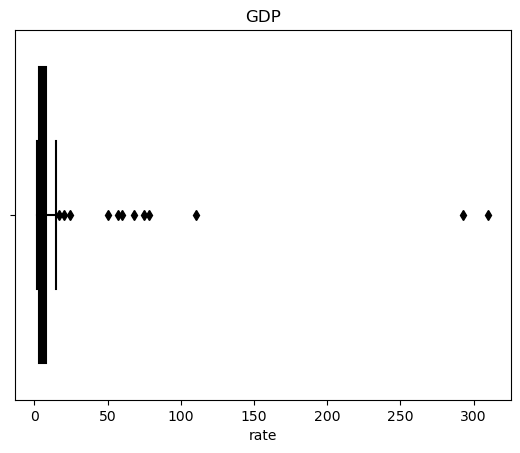

In [9]:
sns.boxplot(x=d['GDP Rate(in Billion $)'],color='black')
plt.title('GDP')
plt.xlabel('rate')
plt.show()

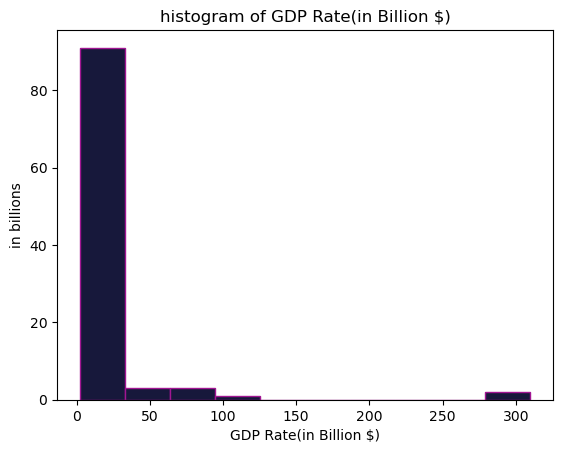

In [10]:
plt.hist(d['GDP Rate(in Billion $)'],color='#17183B',edgecolor='#A11692')
plt.xlabel('GDP Rate(in Billion $)')
plt.ylabel('in billions')
plt.title('histogram of GDP Rate(in Billion $)')
plt.show()

C:\Users\Nalin kumar\AppData\Local\Temp\ipykernel_13912\3554935350.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(d['GDP Rate(in Billion $)'],shade=True)
D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


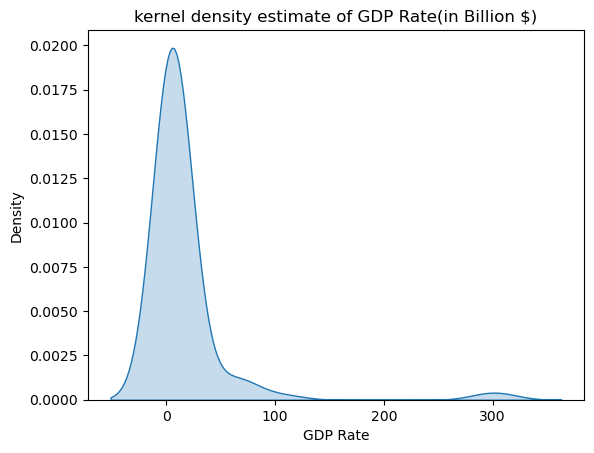

In [11]:
sns.kdeplot(d['GDP Rate(in Billion $)'],shade=True)
plt.xlabel('GDP Rate')
plt.ylabel('Density')
plt.title('kernel density estimate of GDP Rate(in Billion $)')
plt.show()

<Axes: xlabel='Indian States', ylabel='GDP Rate(in Billion $)'>

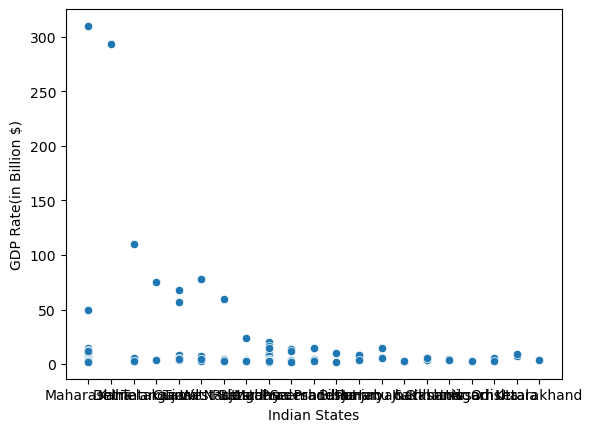

In [12]:
sns.scatterplot(x='Indian States', y='GDP Rate(in Billion $)', data=d)


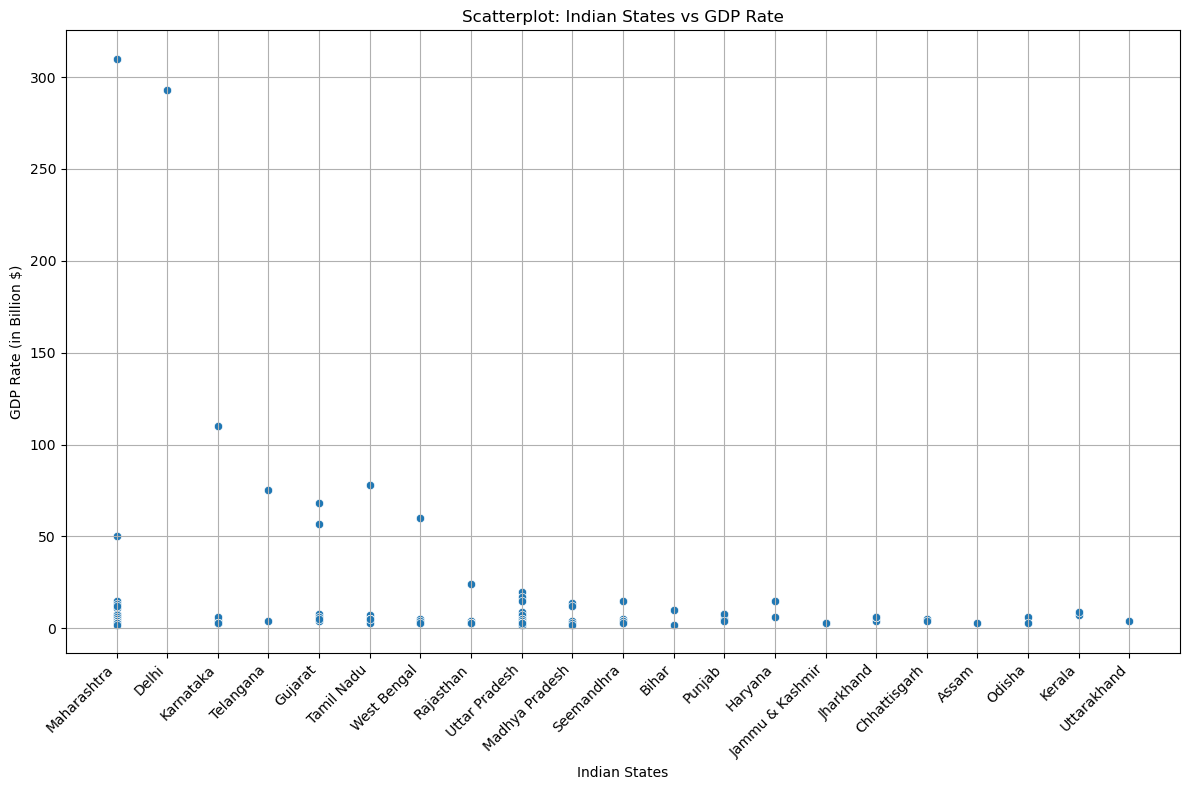

In [13]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='Indian States',
    y='GDP Rate(in Billion $)',
    data=d  # Replace 'd' with your DataFrame variable
)

plt.title('Scatterplot: Indian States vs GDP Rate')
plt.xlabel('Indian States')
plt.ylabel('GDP Rate (in Billion $)')

# Rotate x-axis labels and align them for better readability
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()  # Adjusts spacing to prevent labels from being cut off
plt.show()


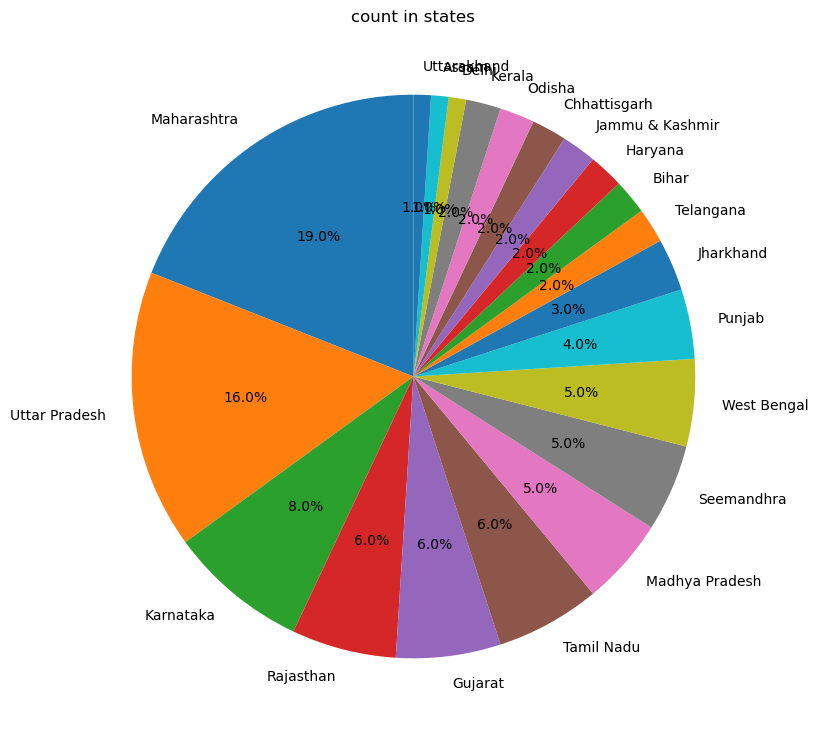

In [47]:
chart=d['Indian States'].value_counts()
plt.figure(figsize=(8,9))
plt.pie(chart,labels=chart.index,autopct='%1.1f%%',startangle=90,)
plt.title('count in states')
plt.axis('equal')
plt.show()

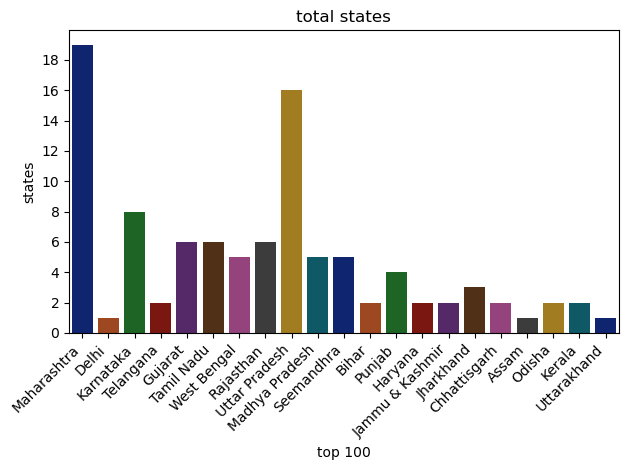

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.countplot(x='Indian States',data=d,palette='dark')
plt.xlabel('top 100')
plt.ylabel('states')
plt.title('total states')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()


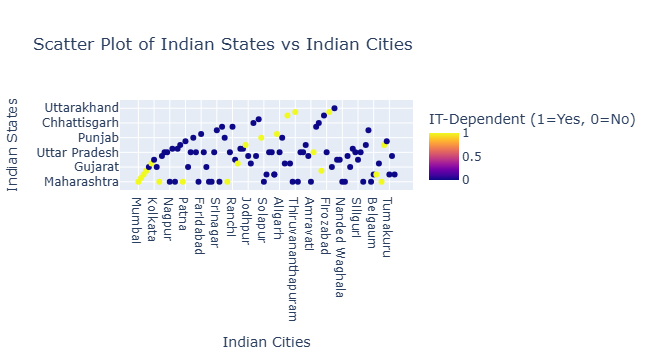

In [16]:
import plotly.express as px

# Ensure the column names in your DataFrame are correct
f = px.scatter(
    d,
    x='Indian Cities',  # Ensure this column exists in your DataFrame
    y='Indian States',  # Ensure this column exists in your DataFrame
    color='IT-Dependent (1=Yes, 0=No)',  # Ensure this column exists
    title='Scatter Plot of Indian States vs Indian Cities',
    labels={
        'Indian States': 'Indian States', 
        'Indian Cities': 'Indian Cities'
    },
    hover_data=['Population', 'GDP Rate(in Billion $)'],  # Use valid column names here
    category_orders={
        'IT-Dependent (1=Yes, 0=No)': ['1', '0']  # Proper list format
    }
)
f.show()


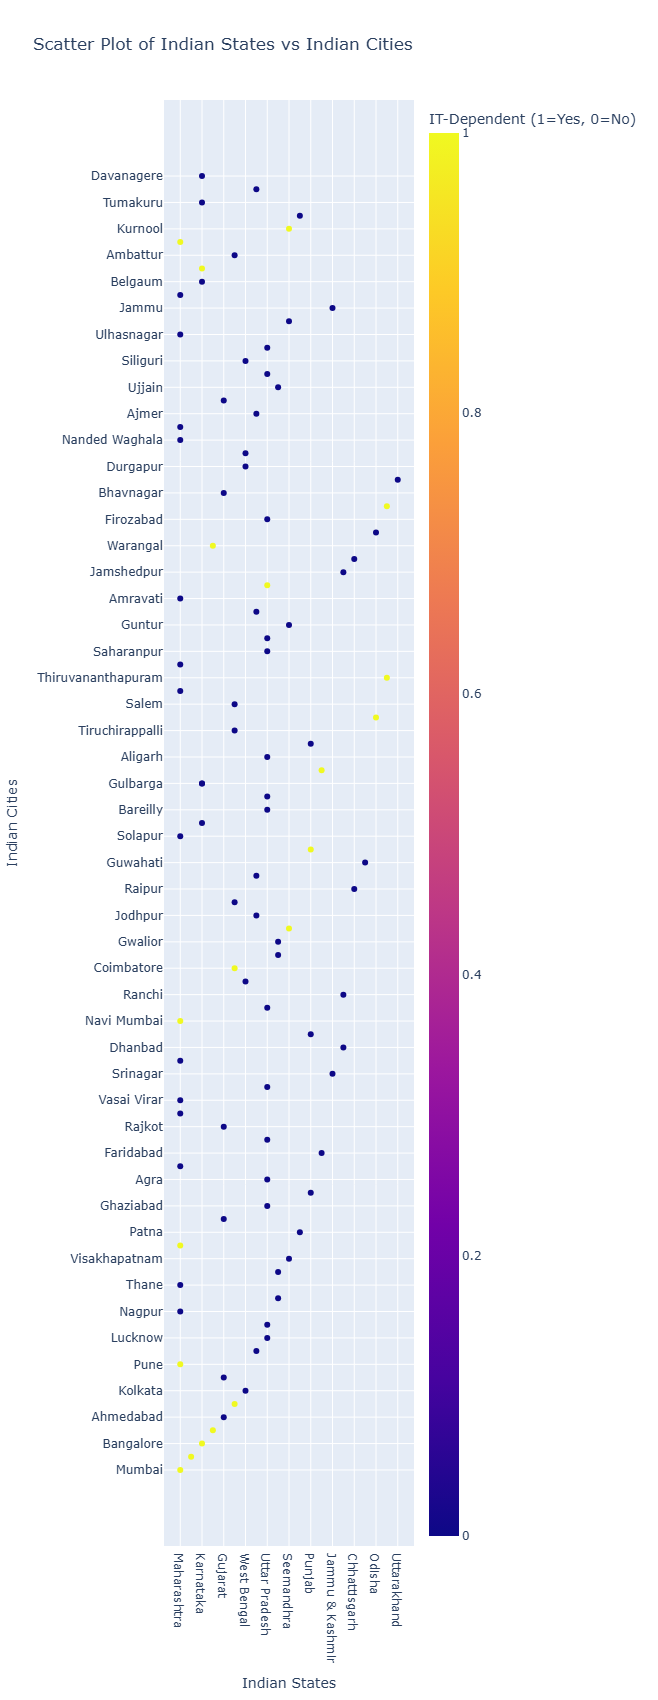

In [17]:
import plotly.express as px

# Ensure the column names in your DataFrame are correct
f = px.scatter(
    d,
    x='Indian States',  # Ensure this column exists in your DataFrame
    y='Indian Cities',  # Ensure this column exists in your DataFrame
    color='IT-Dependent (1=Yes, 0=No)',  # Ensure this column exists
    title='Scatter Plot of Indian States vs Indian Cities',
    labels={
        'Indian States': 'Indian States', 
        'Indian Cities': 'Indian Cities'
    },
    hover_data=['Population', 'GDP Rate(in Billion $)'],  # Use valid column names here
    category_orders={
        'IT-Dependent (1=Yes, 0=No)': ['1', '0']  # Proper list format
    },
    width=1600,  # Set width of the plot
    height=1700   # Set height of the plot
)
f.show()


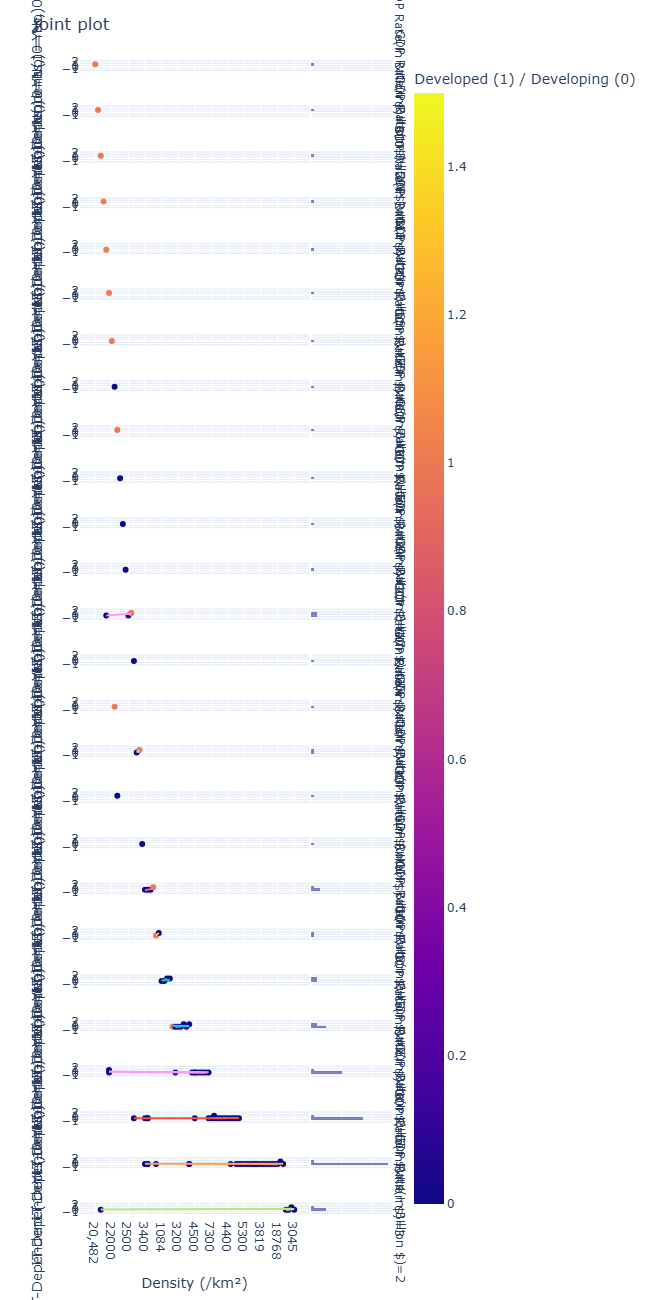

In [18]:
f=px.scatter(d,x='Density (/km²)',y='IT-Dependent (1=Yes, 0=No)',trendline='ols',
             color='Developed (1) / Developing (0)',
             facet_row='GDP Rate(in Billion $)',
             marginal_x='histogram',
             marginal_y='histogram')
f.update_layout(
    title='joint plot',
    height=1300,
    width=1500
)
f.show()
             
             

In [19]:
d

Serial No. Indian Cities Indian States   Population Density (/km²)  \
0            1        Mumbai   Maharashtra  12442373.00         20,482   
1            2         Delhi         Delhi  1,67,87,941         11,320   
2            3     Bangalore     Karnataka    84,43,675          12000   
3            4     Hyderabad     Telangana    67,31,790          10477   
4            5     Ahmedabad       Gujarat    55,77,940          11000   
..         ...           ...           ...          ...            ...   
95          96       Kurnool    Seemandhra     4,68,970           2737   
96          97          Gaya         Bihar     4,63,454           3045   
97          98      Tumakuru     Karnataka     4,55,191           2877   
98          99       Udaipur     Rajasthan     4,45,735           2728   
99         100    Davanagere     Karnataka     4,35,577           2877   

   Literacy  Sex Ratio  GDP Rate(in Billion $) Main Language  \
0    89.73%        853                     310       Marathi   
1    86.20%        868                     293         Hindi   
2    88.71%        923                     110       Kannada   
3    83.26%        955                      75        Telugu   
4    89.62%        898                      68      Gujarati   
..      ...        ...                     ...           ...   
95   74.23%        979                       3        Telugu   
96   85.52%        902                       2         Hindi   
97   90.39%        975                       3       Kannada   
98   89.57%        926                       3         Hindi   
99   88.76%        938                       3       Kannada   

    IT-Dependent (1=Yes, 0=No)  Developed (1) / Developing (0)  
0                            1                               1  
1                            1                               1  
2                            1                               1  
3                            1                               1  
4                            0                               1  
..                         ...                             ...  
95                           1                               0  
96                           0                               0  
97                           0                               0  
98                           0                               0  
99                           0                               0  

[100 rows x 11 columns]

In [20]:
# Grouped Means
grouped = d.groupby('IT-Dependent (1=Yes, 0=No)')['GDP Rate(in Billion $)'].mean()
print(grouped)

# T-test
from scipy.stats import ttest_ind

it_dependent = d[d['IT-Dependent (1=Yes, 0=No)'] == 1]['GDP Rate(in Billion $)']
non_it_dependent = d[d['IT-Dependent (1=Yes, 0=No)'] == 0]['GDP Rate(in Billion $)']

t_stat, p_value = ttest_ind(it_dependent, non_it_dependent)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


IT-Dependent (1=Yes, 0=No)
0     7.5625
1    51.3000
Name: GDP Rate(in Billion $), dtype: float64
T-Statistic: 4.234934173728637, P-Value: 5.163334042785814e-05


C:\Users\Nalin kumar\AppData\Local\Temp\ipykernel_13912\3915983420.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



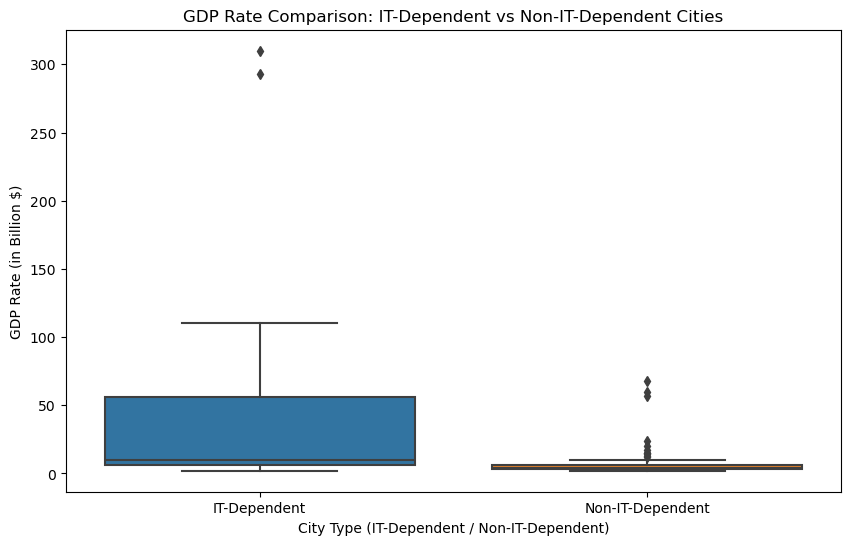

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the two groups into a single DataFrame for easy plotting
data_plot = d[['IT-Dependent (1=Yes, 0=No)', 'GDP Rate(in Billion $)']]
data_plot['IT-Dependent (1=Yes, 0=No)'] = data_plot['IT-Dependent (1=Yes, 0=No)'].map({1: 'IT-Dependent', 0: 'Non-IT-Dependent'})

# Create the Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='IT-Dependent (1=Yes, 0=No)', y='GDP Rate(in Billion $)', data=data_plot)
plt.title('GDP Rate Comparison: IT-Dependent vs Non-IT-Dependent Cities')
plt.xlabel('City Type (IT-Dependent / Non-IT-Dependent)')
plt.ylabel('GDP Rate (in Billion $)')
plt.show()


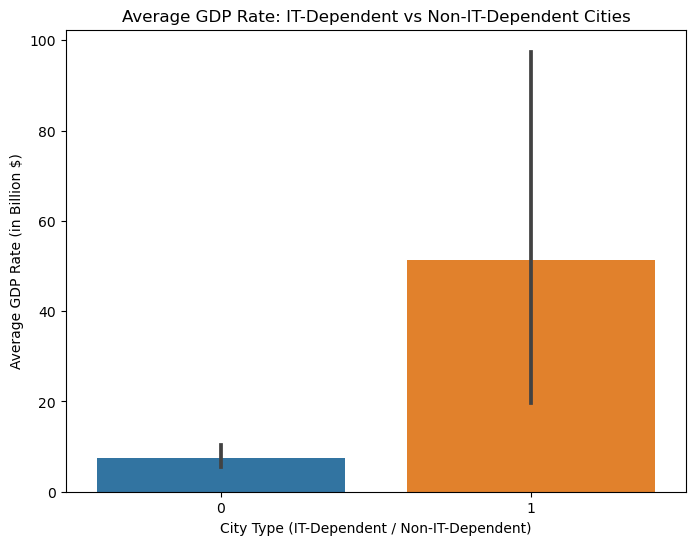

In [27]:

plt.figure(figsize=(8, 6))
sns.barplot(x='IT-Dependent (1=Yes, 0=No)', y='GDP Rate(in Billion $)', data=d)
plt.title('Average GDP Rate: IT-Dependent vs Non-IT-Dependent Cities')
plt.xlabel('City Type (IT-Dependent / Non-IT-Dependent)')
plt.ylabel('Average GDP Rate (in Billion $)')
plt.show()


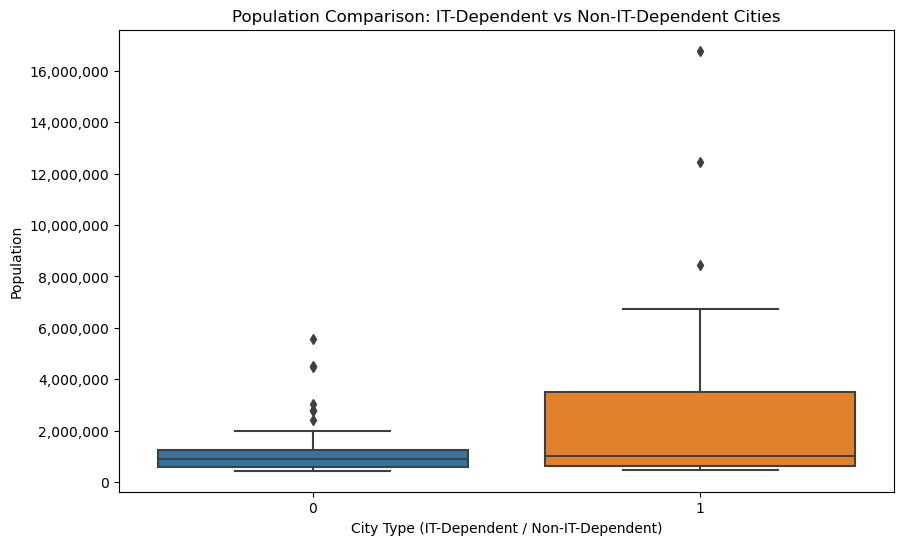

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

d['Population'] = d['Population'].astype(str).str.replace(',', '').astype(float)

# Create the Box Plot for Population
plt.figure(figsize=(10, 6))
sns.boxplot(x='IT-Dependent (1=Yes, 0=No)', y='Population', data=d)
plt.title('Population Comparison: IT-Dependent vs Non-IT-Dependent Cities')
plt.xlabel('City Type (IT-Dependent / Non-IT-Dependent)')
plt.ylabel('Population')

# Format y-axis with commas for better readability
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

plt.show()


In [28]:
import scipy.stats as stats

# Extract data for IT-Dependent and Non-IT-Dependent cities
it_dependent_population = d[d['IT-Dependent (1=Yes, 0=No)'] == 1]['Population']
non_it_dependent_population = d[d['IT-Dependent (1=Yes, 0=No)'] == 0]['Population']

# Perform the ANOVA test
f_stat, p_value = stats.f_oneway(it_dependent_population, non_it_dependent_population)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("reject null value")
else:
    print("fail to reject null value")


F-statistic: 15.119546111505649
P-value: 0.00018377394927127203
reject null value


In [25]:
import scipy.stats as stats

# Extract literacy rates for IT-Dependent and Non-IT-Dependent cities
it_dependent_literacy = d[d['IT-Dependent (1=Yes, 0=No)'] == 1]['Literacy']
non_it_dependent_literacy = d[d['IT-Dependent (1=Yes, 0=No)'] == 0]['Literacy']

# Perform the ANOVA test
f_stat, p_value = stats.f_oneway(it_dependent_literacy, non_it_dependent_literacy)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("reject null value")
else:
    print("fail to reject null value")


ValueError: could not convert string to float: '89.73%'

In [29]:
# Remove '%' symbol from the Literacy column and convert to float
d['Literacy'] = d['Literacy'].replace({'%': ''}, regex=True).astype(float)

# Now the Literacy column should have numerical values without the '%' symbol
print(d['Literacy'].head())  # Check the first few rows to confirm


0    89.73
1    86.20
2    88.71
3    83.26
4    89.62
Name: Literacy, dtype: float64


In [30]:
import scipy.stats as stats

# Extract literacy rates for IT-Dependent and Non-IT-Dependent cities
it_dependent_literacy = d[d['IT-Dependent (1=Yes, 0=No)'] == 1]['Literacy']
non_it_dependent_literacy = d[d['IT-Dependent (1=Yes, 0=No)'] == 0]['Literacy']

# Perform the ANOVA test
f_stat, p_value = stats.f_oneway(it_dependent_literacy, non_it_dependent_literacy)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("reject null value")
else:
    print("fail to reject null value")


F-statistic: 4.754922351664507
P-value: 0.031607981327304475
reject null value


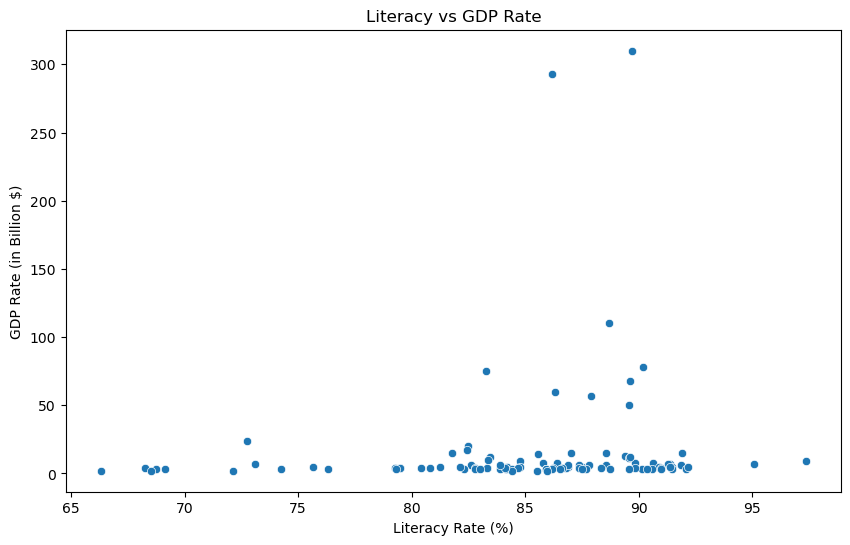

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Literacy vs GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Literacy', y='GDP Rate(in Billion $)', data=d)
plt.title('Literacy vs GDP Rate')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('GDP Rate (in Billion $)')
plt.show()


In [32]:
from scipy.stats import ttest_ind

# Separate the data for IT-Dependent and Non-IT-Dependent cities
it_dependent_gdp = d[d['IT-Dependent (1=Yes, 0=No)'] == 1]['GDP Rate(in Billion $)']
non_it_dependent_gdp = d[d['IT-Dependent (1=Yes, 0=No)'] == 0]['GDP Rate(in Billion $)']

# Perform the T-test
t_stat, p_value = ttest_ind(it_dependent_gdp, non_it_dependent_gdp)

print(f"T-Statistic: {t_stat}")
print(f'P-Value: {p_value}')
if p_value < 0.05:
    print("reject null hypothesis")
else:
    print("failed reject null hypothesis")


T-Statistic: 4.234934173728637
P-Value: 5.163334042785814e-05
reject null hypothesis


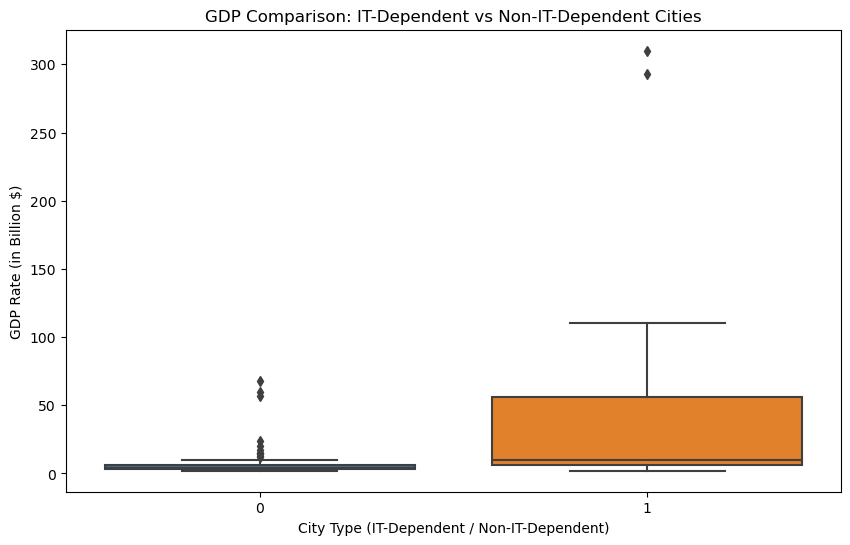

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of GDP comparison between IT-dependent and non-IT-dependent cities
plt.figure(figsize=(10, 6))
sns.boxplot(x='IT-Dependent (1=Yes, 0=No)', y='GDP Rate(in Billion $)', data=d)
plt.title('GDP Comparison: IT-Dependent vs Non-IT-Dependent Cities')
plt.xlabel('City Type (IT-Dependent / Non-IT-Dependent)')
plt.ylabel('GDP Rate (in Billion $)')
plt.show()


In [35]:
# Correlation between IT-dependency (0, 1) and GDP
correlation = d['IT-Dependent (1=Yes, 0=No)'].corr(d['GDP Rate(in Billion $)'])
print(f"Correlation between IT-dependency and GDP: {correlation}")


Correlation between IT-dependency and GDP: 0.39331454202758137


In [36]:
# Calculate the correlation between GDP and Literacy Rate
correlation = d['GDP Rate(in Billion $)'].corr(d['Literacy'])
print(f"Correlation between GDP and Literacy Rate: {correlation}")


Correlation between GDP and Literacy Rate: 0.12204282032848249


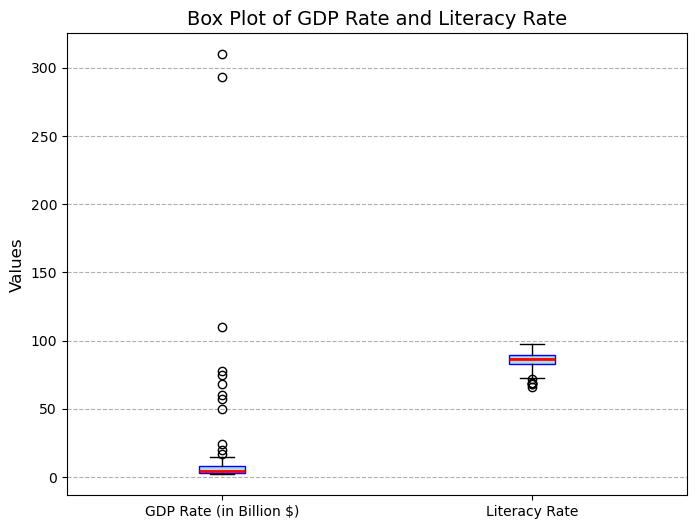

In [37]:
import matplotlib.pyplot as plt

# Data preparation
data = [d['GDP Rate(in Billion $)'], d['Literacy']]
labels = ['GDP Rate (in Billion $)', 'Literacy Rate']

# Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            medianprops=dict(color='red', linewidth=2))

# Add title and labels
plt.title('Box Plot of GDP Rate and Literacy Rate', fontsize=14)
plt.ylabel('Values', fontsize=12)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


In [38]:
from scipy.stats import ttest_ind

# Separate the data for Developed and Developing cities
developed_gdp = d[d['Developed (1) / Developing (0)'] == 1]['GDP Rate(in Billion $)']
developing_gdp = d[d['Developed (1) / Developing (0)'] == 0]['GDP Rate(in Billion $)']

# Perform the T-test
t_stat, p_value = ttest_ind(developed_gdp, developing_gdp)

# Display the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference between GDP of Developed and Developing cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference between GDP of Developed and Developing cities.")


T-Statistic: 6.5600282943655275
P-Value: 2.551515601194776e-09
Reject the null hypothesis: Significant difference between GDP of Developed and Developing cities.


In [39]:
from scipy.stats import ttest_ind

# Separate the data for Developed and Developing cities based on Literacy
developed_literacy = d[d['Developed (1) / Developing (0)'] == 1]['Literacy']
developing_literacy = d[d['Developed (1) / Developing (0)'] == 0]['Literacy']

# Perform the T-test
t_stat, p_value = ttest_ind(developed_literacy, developing_literacy)

# Display the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in Literacy Rate between Developed and Developing cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Literacy Rate between Developed and Developing cities.")


T-Statistic: 1.6834372985035124
P-Value: 0.0954735188633839
Fail to reject the null hypothesis: No significant difference in Literacy Rate between Developed and Developing cities.


In [ ]:
from scipy.stats import ttest_ind

# Calculate the median population to divide the dataset into two groups
median_population = d['Population'].median()

# Separate the data into high population and low population groups
high_population_sex_ratio = d[d['Population'] >= median_population]['Sex Ratio']
low_population_sex_ratio = d[d['Population'] < median_population]['Sex Ratio']

# Perform the T-test
t_stat, p_value = ttest_ind(high_population_sex_ratio, low_population_sex_ratio)

# Display the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in Sex Ratio between high and low population cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Sex Ratio between high and low population cities.")


In [40]:
from scipy.stats import ttest_ind

# Separate the data for Developed and Developing cities
developed_population = d[d['Developed (1) / Developing (0)'] == 1]['Population']
developing_population = d[d['Developed (1) / Developing (0)'] == 0]['Population']

# Perform the T-test
t_stat, p_value = ttest_ind(developed_population, developing_population)

# Display the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in Population between Developed and Developing cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Population between Developed and Developing cities.")


T-Statistic: 6.960974372408111
P-Value: 3.868680433174975e-10
Reject the null hypothesis: Significant difference in Population between Developed and Developing cities.


In [41]:
from scipy.stats import ttest_ind

# Separate the data for Developed and Developing cities based on Sex Ratio
developed_sex_ratio = d[d['Developed (1) / Developing (0)'] == 1]['Sex Ratio']
developing_sex_ratio = d[d['Developed (1) / Developing (0)'] == 0]['Sex Ratio']

# Perform the T-test
t_stat_sex_ratio, p_value_sex_ratio = ttest_ind(developed_sex_ratio, developing_sex_ratio)

# Display the results
print(f"T-Statistic for Sex Ratio: {t_stat_sex_ratio}")
print(f"P-Value for Sex Ratio: {p_value_sex_ratio}")

if p_value_sex_ratio < 0.05:
    print("Reject the null hypothesis: Significant difference in Sex Ratio between Developed and Developing cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Sex Ratio between Developed and Developing cities.")


T-Statistic for Sex Ratio: -2.6023348287259793
P-Value for Sex Ratio: 0.010695216932362153
Reject the null hypothesis: Significant difference in Sex Ratio between Developed and Developing cities.


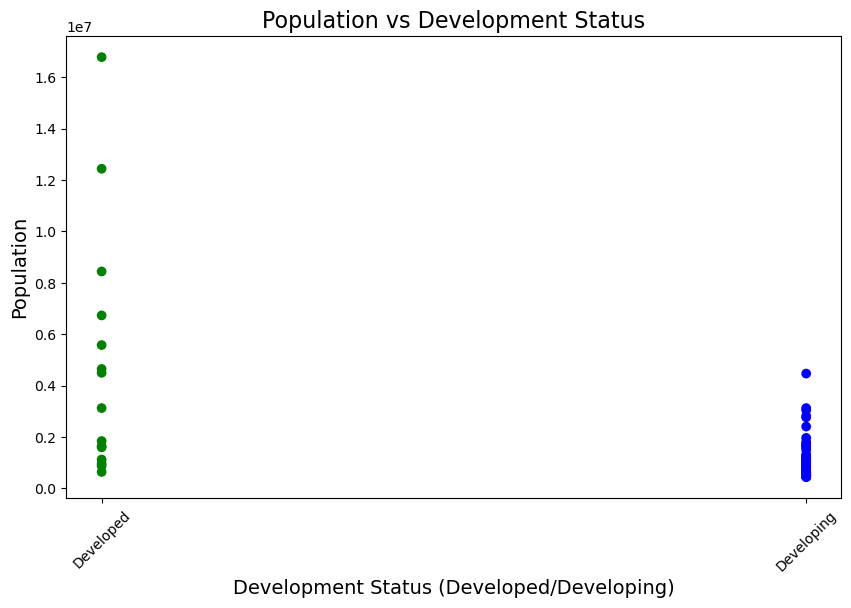

In [42]:
import matplotlib.pyplot as plt

# Assign Development Status (Developed = 1, Developing = 0) for plotting
d['Development Status'] = d['Developed (1) / Developing (0)'].apply(lambda x: 'Developed' if x == 1 else 'Developing')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(d['Development Status'], d['Population'],  color=['green' if x == 'Developed' else 'blue' for x in d['Development Status']])

# Adding title and labels
plt.title('Population vs Development Status', fontsize=16)
plt.xlabel('Development Status (Developed/Developing)', fontsize=14)
plt.ylabel('Population', fontsize=14)

# Display the plot
plt.xticks(rotation=45)
plt.show()


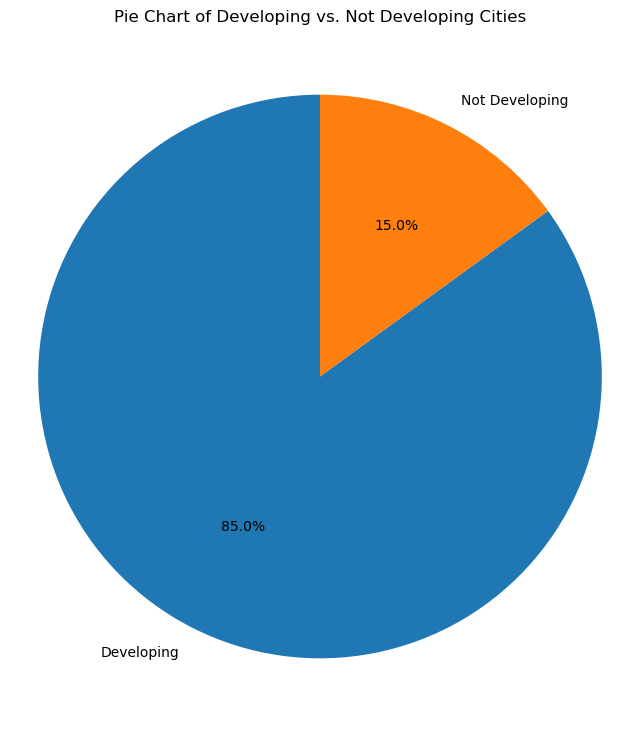

In [43]:
import matplotlib.pyplot as plt

# Get the value counts for Developing (0) and Not Developing (1)
d0_d1 = d['Developed (1) / Developing (0)'].value_counts()

# Adjust the labels for Developing and Not Developing
labels = ['Developing', 'Not Developing']  # 0 -> Developing, 1 -> Not Developing

# Create the pie chart
plt.figure(figsize=(8, 9))
plt.pie(d0_d1, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Developing vs. Not Developing Cities')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


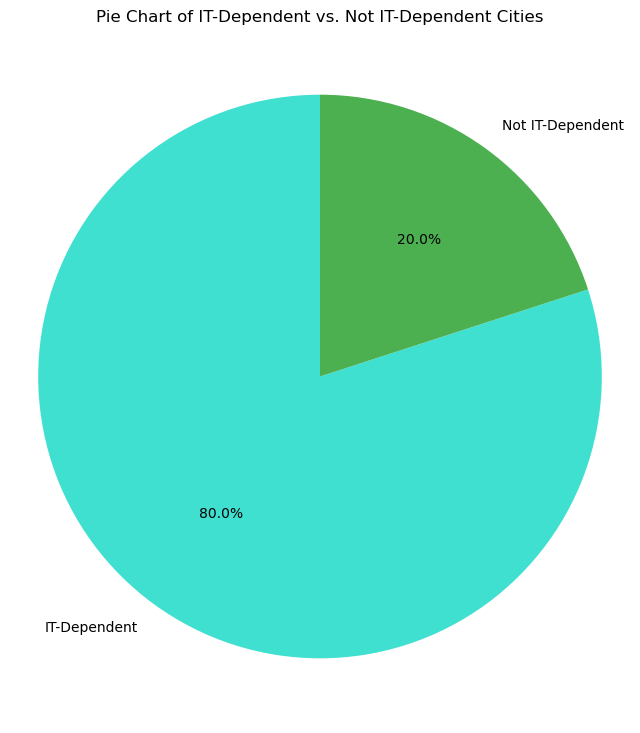

In [44]:
import matplotlib.pyplot as plt

# Get the value counts for IT-Dependent (1) and Not IT-Dependent (0)
it_dependent = d['IT-Dependent (1=Yes, 0=No)'].value_counts()

# Adjust the labels for IT-Dependent and Not IT-Dependent
labels = ['IT-Dependent', 'Not IT-Dependent']  # 1 -> IT-Dependent, 0 -> Not IT-Dependent
colors = ['#40E0D0', '#4CAF50']
# Create the pie chart
plt.figure(figsize=(8, 9))
plt.pie(it_dependent, labels=labels, autopct='%1.1f%%', startangle=90,colors=colors)
plt.title('Pie Chart of IT-Dependent vs. Not IT-Dependent Cities')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


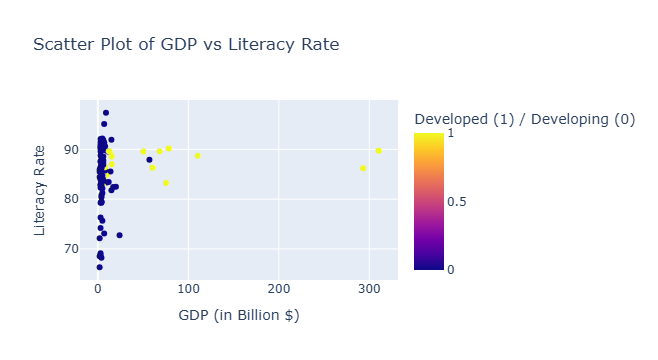

In [45]:
import plotly.express as px

# Scatter plot for GDP and Literacy Rate
fig = px.scatter(
    d,
    x='GDP Rate(in Billion $)',  # GDP values
    y='Literacy',  # Literacy rate values
    color='Developed (1) / Developing (0)',  # Color by development status
    title='Scatter Plot of GDP vs Literacy Rate',
    labels={
        'GDP Rate(in Billion $)': 'GDP (in Billion $)', 
        'Literacy': 'Literacy Rate'
    },
    hover_data=['Indian Cities', 'Indian States'],  # Optional hover data
    category_orders={
        'Developed (1) / Developing (0)': ['1', '0']  # Ordered categories for color
    }
)

fig.show()


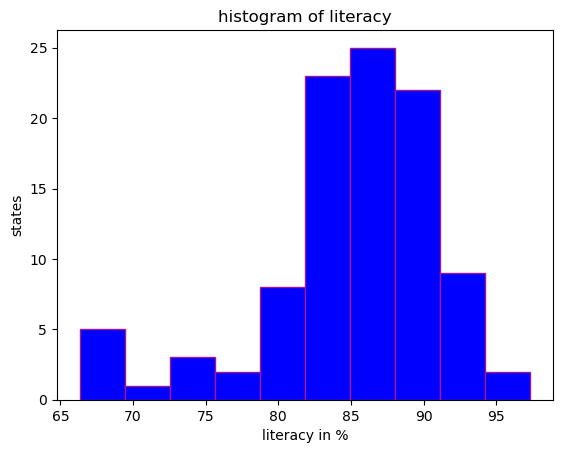

In [46]:
plt.hist(d['Literacy'],color='blue',edgecolor='#A11692')
plt.xlabel('literacy in %')
plt.ylabel('states')
plt.title('histogram of literacy')
plt.show()

In [ ]:
d.head(5)